In [127]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import seaborn as sns
import seaborn.objects as so 
import numpy as np
import pandas as pd
from prophet import Prophet
import datetime as dt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


%matplotlib inline

In [128]:
# Load the data as a data frame
df = pd.read_csv("./Resources/HR_Analytics.csv")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [130]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [131]:
#df.head()
#df.describe()
df.head()
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [132]:
AgeGroup = list(df['AgeGroup'].unique())
BusinessTravel = list(df['BusinessTravel'].unique())
Department = list(df['Department'].unique())
EducationField = list(df['EducationField'].unique())
JobRole = list(df['JobRole'].unique())
SalarySlab = list(df['SalarySlab'].unique())


In [133]:
print(f"AgeGroup : {AgeGroup}")
print(f"BusinessTravel : {BusinessTravel}")
print(f"Department : {Department}")
print(f"EducationField : {EducationField}")
print(f"SalarySlab : {SalarySlab}")
print(f"JobRole : {JobRole}")


AgeGroup : ['18-25', '26-35', '36-45', '46-55', '55+']
BusinessTravel : ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely']
Department : ['Research & Development', 'Sales', 'Human Resources']
EducationField : ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources']
SalarySlab : ['Upto 5k', '5k-10k', '10k-15k', '15k+']
JobRole : ['Laboratory Technician', 'Sales Representative', 'Research Scientist', 'Human Resources', 'Manufacturing Director', 'Sales Executive', 'Healthcare Representative', 'Research Director', 'Manager']


In [134]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        print(col_name)

EmpID
AgeGroup
Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
SalarySlab
Over18
OverTime


In [135]:
# Create a new column to indicate if an employee left the company
#df['LeftCompany'] = df['Attrition'].apply(lambda x: 1 if  x == 'Yes' else 0)
df['Churn'] = df['Attrition'].map({'Yes': 1, 'No': 0})

#Variables
variables = ['AgeGroup','SalarySlab', 'Department']



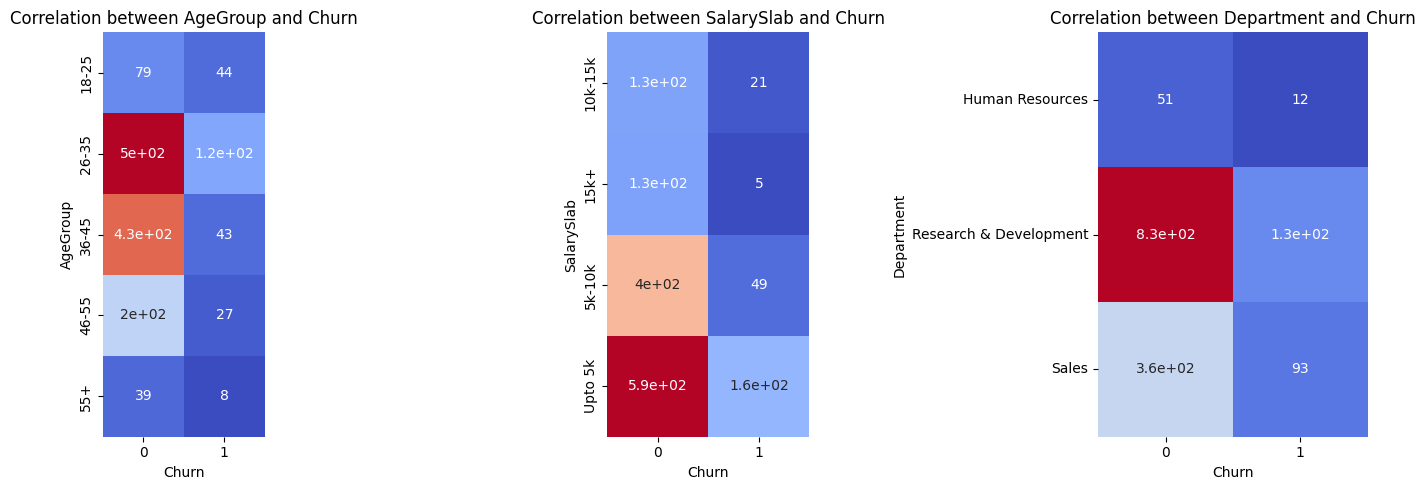

In [136]:
#Plot the correlations as heatmaps 
fig, axs = plt.subplots(1, len(variables), figsize=(15,5))
for i, variable in enumerate(variables):
    corr = df.groupby([variable, 'Churn']).size().unstack('Churn').fillna(0)
    sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, ax=axs[i], cbar=False)
    axs[i].set_title(f'Correlation between {variable} and Churn')
plt.tight_layout()
plt.show()   



In [137]:
# Churn features 
x = df.drop('Churn', axis= 1)
y = df['Churn']

In [138]:
# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split\
    (x, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [139]:
# Identify non-numericals
# Encode non-numericals as a new column in the dataframe
# Fit the model with the encoded data

non_numerical_features = x_train.select_dtypes(exclude=['number'])
x_train_encoded = pd.get_dummies\
    (x_train, columns=non_numerical_features.columns)
dt_model.fit(x_train_encoded, y_train)




DecisionTreeClassifier(random_state=42)

In [140]:
# Encode x_test 
common_columns = x_test.columns.intersection(x_train.columns)
x_test_encoded = pd.get_dummies(x_test, columns = common_columns)
x_test_encoded = x_test_encoded.reindex\
    (columns=x_train_encoded.columns, fill_value=0)
y_pred = dt_model.predict(x_test_encoded)


In [141]:
# View model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00        47

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296

Confusion Matrix:
[[249   0]
 [  0  47]]


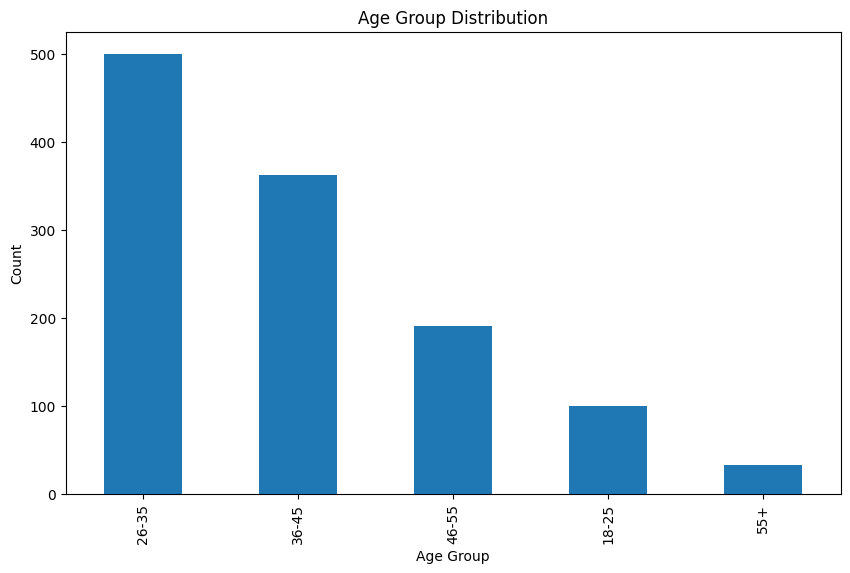

In [147]:
plt.figure(figsize=(10, 6))
x_train['AgeGroup'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

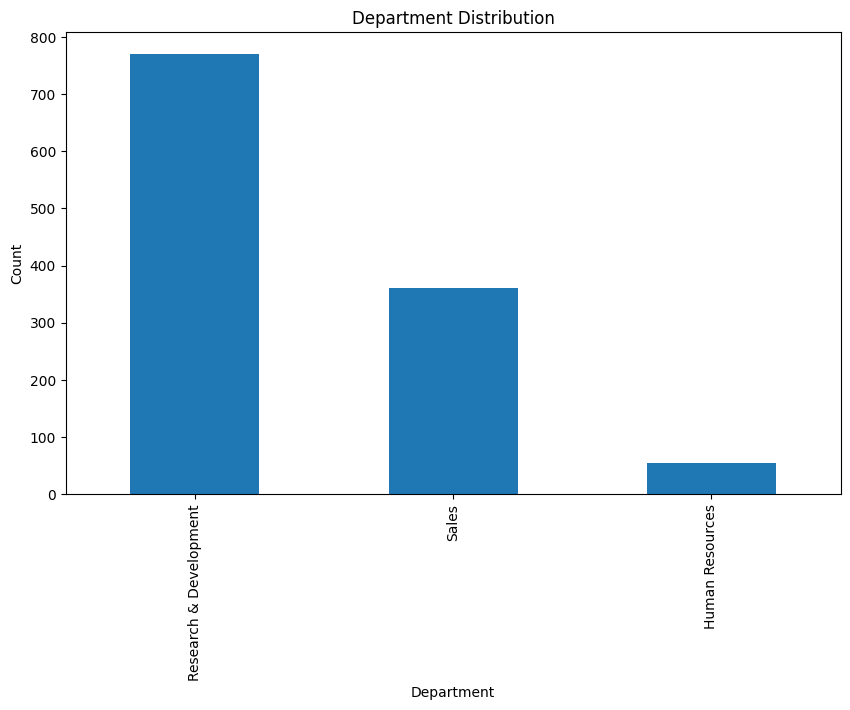

In [148]:
plt.figure(figsize=(10, 6))
x_train['Department'].value_counts().plot(kind='bar')
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

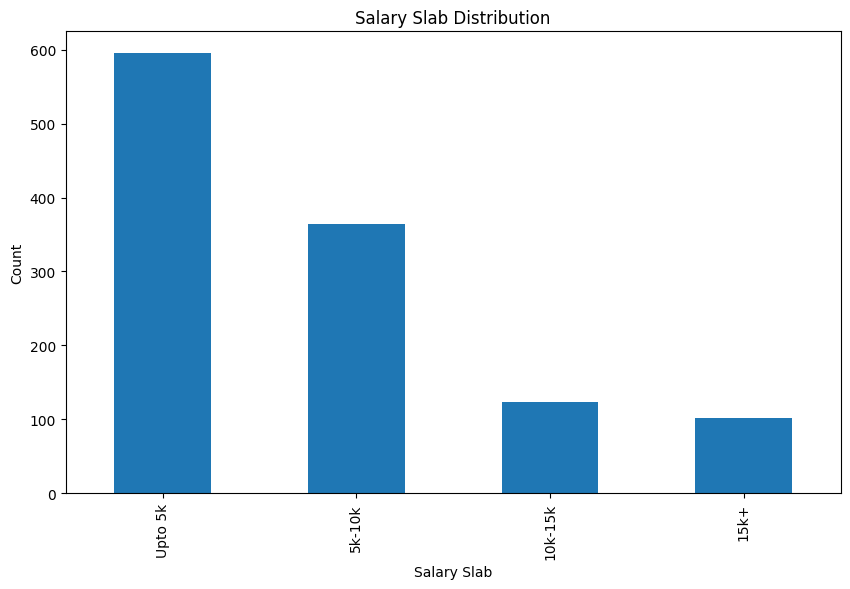

In [149]:
plt.figure(figsize=(10, 6))
x_train['SalarySlab'].value_counts().plot(kind='bar')
plt.title('Salary Slab Distribution')
plt.xlabel('Salary Slab')
plt.ylabel('Count')
plt.show()

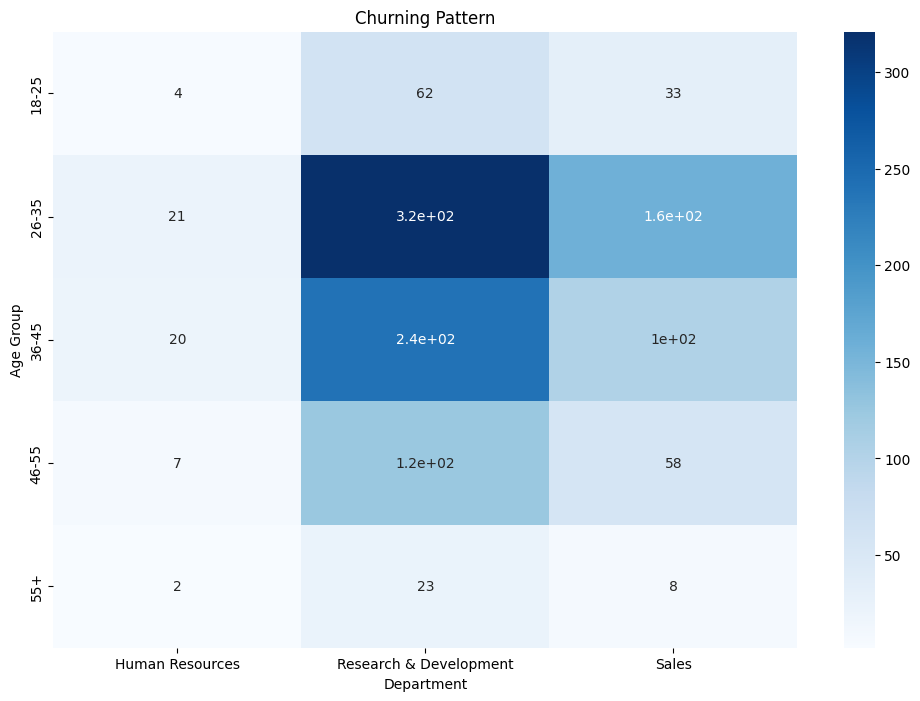

In [150]:
pivot_table = pd.pivot_table(x_train, index='AgeGroup', \
    columns='Department', values='SalarySlab', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Churning Pattern')
plt.xlabel('Department')
plt.ylabel('Age Group')
plt.show()

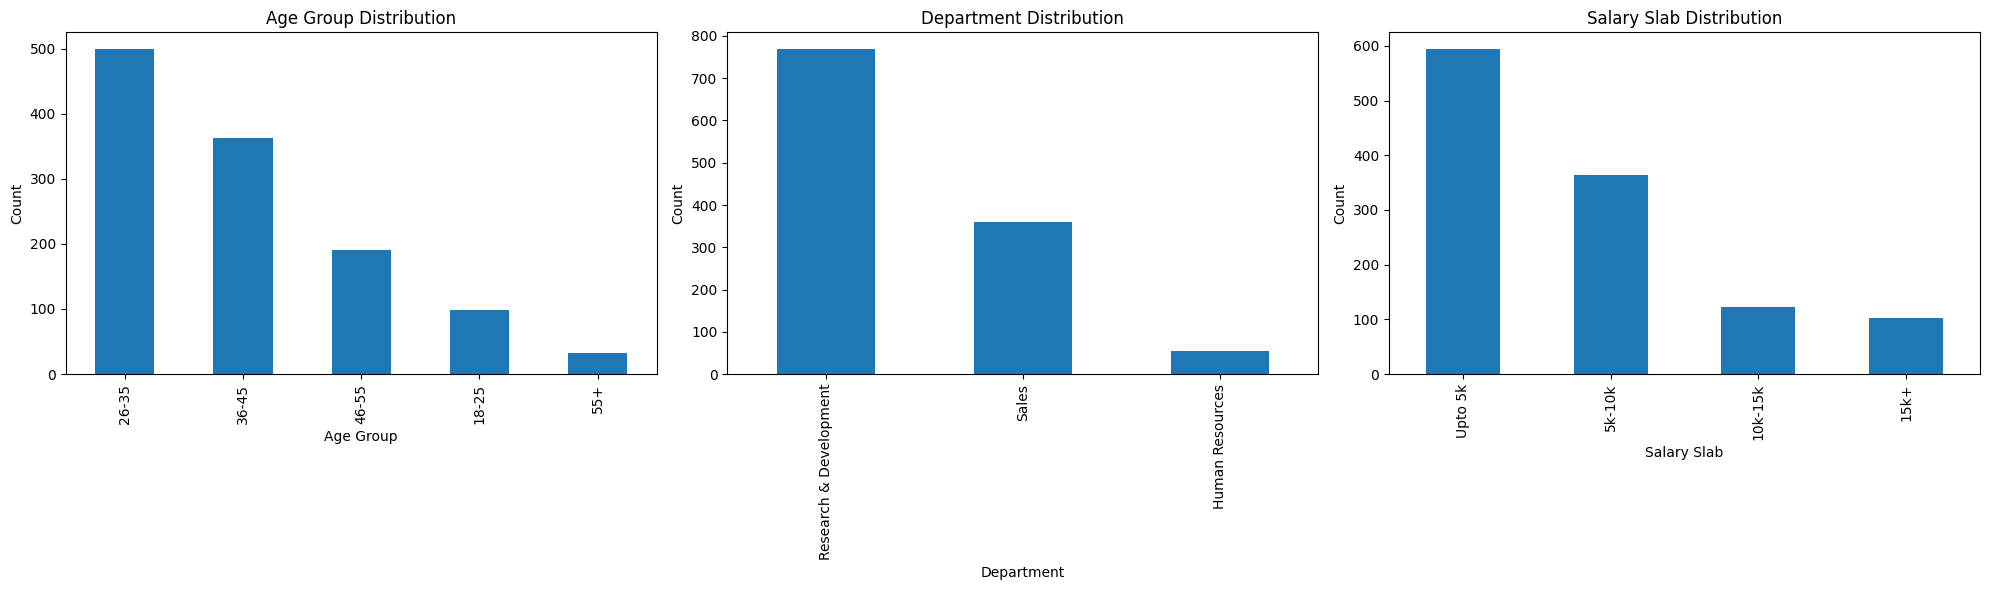

In [151]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot AgeGroup
x_train['AgeGroup'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Age Group Distribution')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Count')

# Plot Department
x_train['Department'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Department Distribution')
axs[1].set_xlabel('Department')
axs[1].set_ylabel('Count')

# Plot SalarySlab
x_train['SalarySlab'].value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Salary Slab Distribution')
axs[2].set_xlabel('Salary Slab')
axs[2].set_ylabel('Count')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

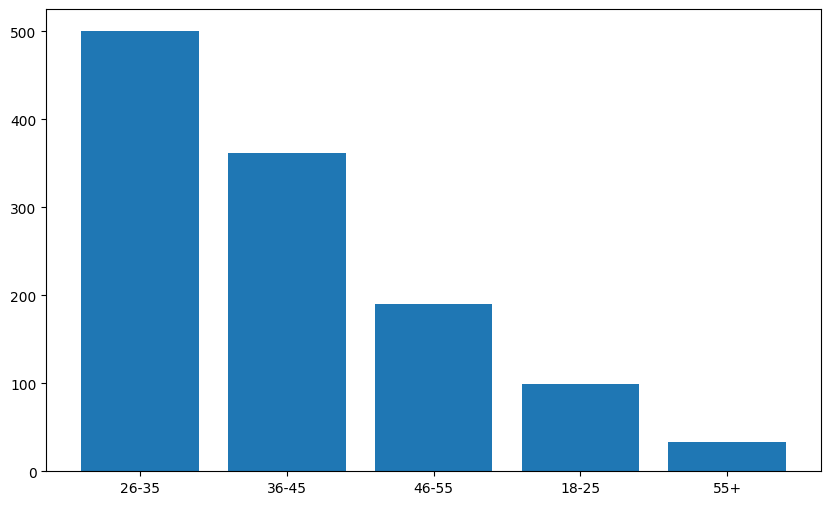

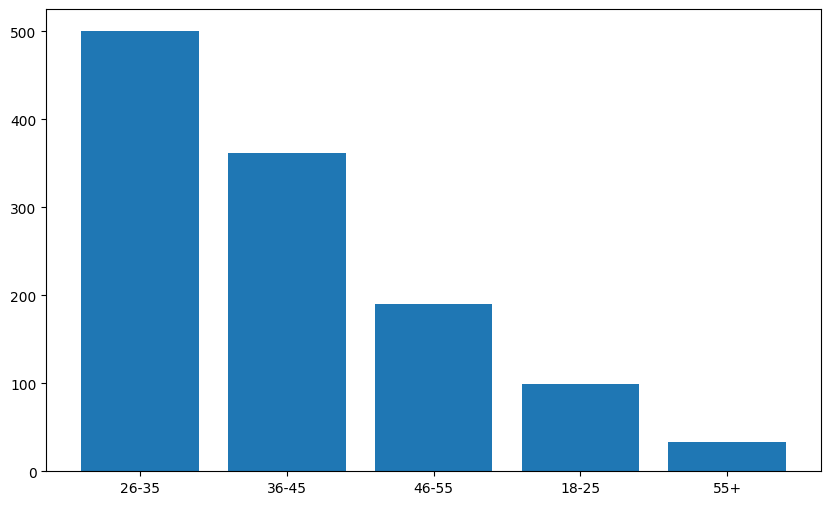

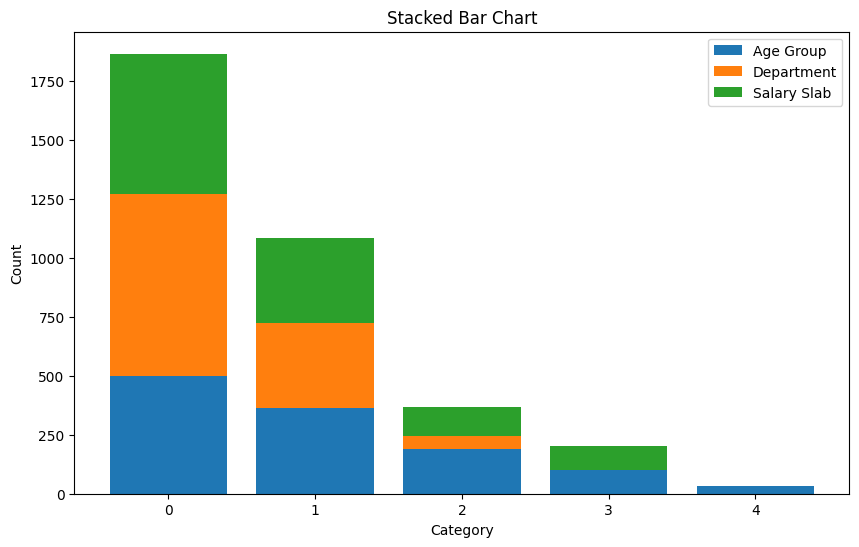

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot age group
age_counts = x_train['AgeGroup'].value_counts()
ax.bar(range(len(age_counts)), age_counts.values, label='Age Group')

# Plot department
dept_counts = x_train['Department'].value_counts()
max_len = max(len(age_counts), len(dept_counts))
bottom = np.zeros(max_len)
bottom[:len(age_counts)] = age_counts.values
ax.bar(range(len(dept_counts)), dept_counts.values, bottom=bottom[:len(dept_counts)], label='Department')

# Plot salary slab
salary_counts = x_train['SalarySlab'].value_counts()
max_len = max(max_len, len(salary_counts))
bottom[:len(dept_counts)] += dept_counts.values
ax.bar(range(len(salary_counts)), salary_counts.values, bottom=bottom[:len(salary_counts)], label='Salary Slab')

# Set title and labels
ax.set_title('Stacked Bar Chart')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

# Legend
ax.legend()

plt.show()

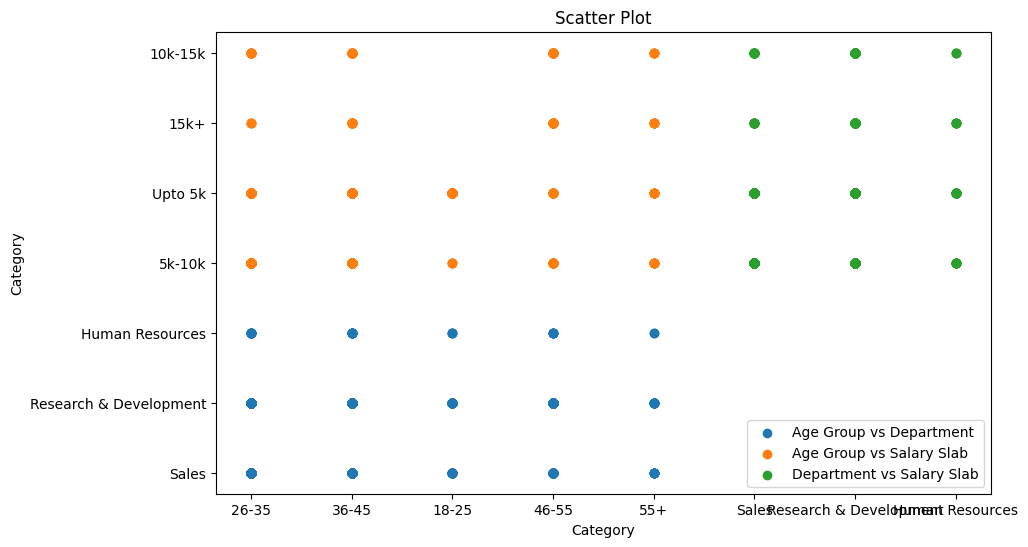

In [155]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot age group vs department
ax.scatter(x_train['AgeGroup'], x_train['Department'], label='Age Group vs Department')

# Plot age group vs salary slab
ax.scatter(x_train['AgeGroup'], x_train['SalarySlab'], label='Age Group vs Salary Slab')

# Plot department vs salary slab
ax.scatter(x_train['Department'], x_train['SalarySlab'], label='Department vs Salary Slab')

# Set title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('Category')
ax.set_ylabel('Category')

# Legend
ax.legend()

plt.show()